# Table of Contents

* [1. Preprocessing, imports and definitions](#1.-Preprocessing,-imports-and-definitions)
* [2. Importing all relevant cSVs as Dataframes](#2.-Importing-all-relevant-CSVs-as-Dataframes)

* [3. Pro Data](#3.-Pro-Data)
    * [3.1. Lexicon or rule based classification](#3.1.-Lexicon-or-rule-based-classification)
    * [3.2. Visualise data](#3.2.-Visualise-data)
    * [3.3. Machine Learning](#3.3.-Machine-Learning)
        * [3.3.1. Tokenise](#3.3.1.-Tokenise)
        * [3.3.2. Lemmatise](#3.3.2.-Lemmatise)
    * [3.4. Removing Stop Words](#3.4.-Removing-Stop-Words)
        * [3.4.1. Negative Word Cloud without stop words](#3.4.1.-Negative-Word-Cloud-without-stop-words)
        * [3.4.2. Positive Word Cloud without stop words](#3.4.2.-Positive-Word-Cloud-without-stop-words)
    * [3.5. Count Vectorisation](#3.5.-Count-Vectorisation)
    * [3.6. TFIDF](#3.6.-TFIDF)
    * [3.7. TFIDF Support Vector Machine](#3.7.-TFIDF-Support-Vector-Machine)
        * [3.7.1. Training](#3.7.1.-Training)
        * [3.7.2. Pro Data Set ML](#3.7.2.-Pro-Data-Set-ML)
    * [3.8. Data Analysis](#3.8.-Data-Analysis)
    
* [4. Anti Data](#4.-Anti-Data)
    * [4.1. Lexicon-based Sentiment Analysis](#4.1.-Lexicon-based-Sentiment-Analysis)
    * [4.2 Visualise Data](#4.2.-Visualise-Data)
    * [4.3. Machine Learning](#4.3.-Machine-Learning)
        * [4.3.1. Tokenise](#4.3.1.-Tokenise)
        * [4.3.2 Lemmatise](#4.3.2.-Lemmatise)
    * [4.4. Removing Stop Words](#4.4.-Removing-Stop-Words)
        * [4.4.1. Negative Word Cloud without stop words](#4.4.1.-Negative-Word-Cloud-without-stop-words)
        * [4.4.2. Positive Word Cloud without stop words](#4.4.2.-Positive-Word-Cloud-without-stop-words)
    * [4.5. Count Vectorisation](#4.6.-Count-Vectorisation)
    * [4.6. TFIDF](##4.8.-TFIDF)
    * [4.7. TFIDF Support Vector Machine](#4.7.-TFIDF-Support-Vector-Machine)
        * [4.7.1. Training](#4.7.1.-Training)
        * [4.7.2. Anti Data Set ML](#4.7.2.-Anti-Data-Set-ML)
    * [4.8. Data Analysis](#4.8.-Data-Analysis)
    
* [5. Hypothesis Tests](#5.-Hypothesis-Tests)
    * [5.1. Pro-Trump Data](#5.1.-Pro-Trump-Data)
    * [5.2. Anti-Trump Data](#5.2.-Anti-Trump-Data) 
    * [5.3. All Data](#5.3.-All-Data) 



In [1]:
import pandas as pd
import re
import numpy as np
import pandas as pd
import typing

#vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# plotting
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

#stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

In [2]:
pip install vaderSentiment


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1. Preprocessing, imports and definitions

In [3]:
# Defining dictionary containing all emojis and their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

# Importing stopword list
stopwordlist: typing.List = stopwords.words('english')

In [4]:
def preprocess(textdata):
    processedText = []
    
    # Creating lemmatizer and stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
     
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)  
        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

# 2. Importing all relevant CSVs as Dataframes

In [5]:
fullprodf1 = pd.read_csv('proTrump_girl_short.csv')

prodf1 = fullprodf1[['Comment Text']]

In [6]:
fullprodf2 = pd.read_csv('proTrump_girl2_short.csv')

prodf2 = fullprodf2[['Comment Text']] 

In [7]:
fullprodf3 = pd.read_csv('proTrump_why_short.csv')

prodf3 = fullprodf3[['Comment Text']]

In [8]:
procsv = ['proTrump_girl_short.csv', 'proTrump_girl2_short.csv', 'proTrump_why_short.csv']

In [9]:
fullprodfs = [pd.read_csv(file) for file in procsv]

fullprodfs = pd.concat(fullprodfs, ignore_index = True) 


In [10]:
prodfs = fullprodfs[['Comment Text']]

In [11]:
fullantidf1 = pd.read_csv('antiTrump_freeda_short.csv')

antidf1 = fullantidf1[['Comment Text']]

In [12]:
fullantidf2 = pd.read_csv('antiTrump_dancinglady_short.csv')

antidf2 = fullantidf2[['Comment Text']]

In [13]:
fullantidf3 = pd.read_csv('antiTrump_sarcastic_short.csv')

antidf3 = fullantidf3[['Comment Text']]

In [14]:
anticsv = ['antiTrump_freeda_short.csv','antiTrump_dancinglady_short.csv', 'antiTrump_sarcastic_short.csv']

In [15]:
fullantidfs = [pd.read_csv(file) for file in anticsv]

fullantidfs = pd.concat(fullantidfs, ignore_index = True) 


In [16]:
antidfs = fullantidfs[['Comment Text']]

# 3. Pro Data

## 3.1. Lexicon or rule based classification

In [17]:
protext = preprocess(prodfs['Comment Text'])

In [18]:
analyzer = SentimentIntensityAnalyzer()
for text in protext:
    vs = analyzer.polarity_scores(text)
    print("{:-<65} {}".format(text, str(vs)))
    

there were 120 school schooling when he wa president thought ---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
and there been 213 since biden became president ----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pablochavezvalencia1tiktok -------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
there been ton of school shooting with all president ------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
what did trump have to do with it ------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----------------------------------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
might wanna go look up your statistic dear ---------------------- {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.3818}
see after trump he just caught trump wave ----------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nothing that the point nra owns t

yes aware not all of them are the same however they should be able to make each detention center better with all that funding  {'neg': 0.086, 'neu': 0.722, 'pos': 0.192, 'compound': 0.4767}
you know what all of that money he funded still wasn enough and the department of defense didn want to let him fund detention center more money  {'neg': 0.085, 'neu': 0.819, 'pos': 0.096, 'compound': -0.1779}
where do you get this that not bit true he is the only pres to recognize lgbtq and stand for their right please research  {'neg': 0.088, 'neu': 0.826, 'pos': 0.086, 'compound': -0.0083}
he also responsible for 170 00 american death within span of month lol  {'neg': 0.205, 'neu': 0.526, 'pos': 0.268, 'compound': 0.0516}
why would people care to stay inside when the president of their country isn taking it seriously how are uneducated american supposed to just  {'neg': 0.063, 'neu': 0.818, 'pos': 0.119, 'compound': 0.3612}
cuz america free country and proud the gov can control me ------- {'neg': 

In [19]:
analyzer = SentimentIntensityAnalyzer()
prodfs['rating'] = prodfs['Comment Text'].apply(analyzer.polarity_scores)
prodfs = pd.concat([prodfs.drop(['rating'], axis=1), prodfs['rating'].apply(pd.Series)], axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/300440163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prodfs['rating'] = prodfs['Comment Text'].apply(analyzer.polarity_scores)


In [20]:
sentiment = []
for sentence in prodfs['Comment Text']:
    
    sid_obj = SentimentIntensityAnalyzer()
    
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
     # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        
        sentiment.append('Positive')
 
    elif sentiment_dict['compound'] <= - 0.05 :
         sentiment.append('Negative')
 
    else :
         sentiment.append('Neutral')

In [21]:
prodfs['sentiment'] = sentiment

In [22]:
prodfs

,Comment Text,neg,neu,pos,compound,sentiment
0,There were 120 school schooling’s when he was ...,0.000,1.000,0.000,0.0000,Neutral
1,and there’s been 213 since Biden became president,0.000,1.000,0.000,0.0000,Neutral
2,Pablochavezvalencia1tiktok,0.000,1.000,0.000,0.0000,Neutral
3,There’s been tons of school shooting with all ...,0.000,1.000,0.000,0.0000,Neutral
4,what did trump have to do with it,0.000,1.000,0.000,0.0000,Neutral
...,...,...,...,...,...,...
2526,I support Trump,0.000,0.426,0.574,0.4019,Positive
2527,He lost lol,0.377,0.164,0.459,0.1280,Positive
2528,Biden won soooo <3,0.000,0.233,0.767,0.7650,Positive
2529,🇺🇸😎TRUMP 2020😎🇺🇸,0.000,0.571,0.429,0.7184,Positive


In [23]:
sentprodfs = prodfs[['Comment Text', 'sentiment']]

In [24]:
sentprodfs

,Comment Text,sentiment
0,There were 120 school schooling’s when he was ...,Neutral
1,and there’s been 213 since Biden became president,Neutral
2,Pablochavezvalencia1tiktok,Neutral
3,There’s been tons of school shooting with all ...,Neutral
4,what did trump have to do with it,Neutral
...,...,...
2526,I support Trump,Positive
2527,He lost lol,Positive
2528,Biden won soooo <3,Positive
2529,🇺🇸😎TRUMP 2020😎🇺🇸,Positive


## 3.2. Visualise data

In [25]:
def print_top_n_reviews(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Review: {row[0]}")

In [26]:
print_top_n_reviews(prodfs, 'pos', 10)

Score: 1.0, Review: nice
Score: 1.0, Review: Agree
Score: 1.0, Review: Yes
Score: 1.0, Review: Yes
Score: 1.0, Review: Yes
Score: 1.0, Review: Yes
Score: 1.0, Review: Yes
Score: 1.0, Review: Solid
Score: 1.0, Review: Sure
Score: 1.0, Review: TRUE


In [27]:
print_top_n_reviews(prodfs, 'neg', 10)

Score: 1.0, Review: Rape
Score: 1.0, Review: No
Score: 1.0, Review: Gullible
Score: 1.0, Review: Nah Nah
Score: 1.0, Review: Nah
Score: 1.0, Review: No
Score: 1.0, Review: nah
Score: 1.0, Review: No
Score: 1.0, Review: Leave
Score: 1.0, Review: unfortunately


## 3.3. Machine Learning

In [28]:
def clean_tweets(text):
    import string 
    from string import digits
    remove_digits = str.maketrans('', '', digits)
    text=text.translate(str.maketrans('', '', string.punctuation))#removing all ponctuations
    text =text.translate(remove_digits)
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub("@[\w]*","",text)# removed @mention
    
    
    text=re.sub("[^\w\s#@/:%.,_-]", "", text, flags=re.UNICODE)#remove emoji
    
    text = text.replace('x', '')
    text=re.sub(r'https?:\/\/\s+','',text)#remove the hyper link
    text=re.sub("http\\w+", "",text)
    
    #text = re.sub("https?://[A-Za-z0-9./]*","",text)
    
    text=re.sub(r'^[A-Za-z0-9.!?]+'," ",text) ##Removing digits and punctuations
    text=re.sub(r'#','',text)# removing hashtag
    text=re.sub(r' +'," ",text)
    text = re.sub("\n","",text)
    text = text.lower()

    
    text = re.sub("^\\s+|\\s+$", "", text)  # Remove leading and trailing white space
    
    return text




In [29]:
sentprodfs['Comment Text'] = sentprodfs['Comment Text'].apply(clean_tweets)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/3326386542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentprodfs['Comment Text'] = sentprodfs['Comment Text'].apply(clean_tweets)


### 3.3.1. Tokenise

In [30]:
sentences=[]
words=[]
for i in range(0,sentprodfs.shape[0]):
    sentences.extend(nltk.sent_tokenize(sentprodfs['Comment Text'][i]))
    words.extend(nltk.word_tokenize(sentprodfs['Comment Text'][i]))
    

In [31]:
for i in range(0,len(sentences)):
    words=nltk.word_tokenize(sentences[i])

In [32]:
sentences = sentprodfs.iloc[0]
sentences['Comment Text']

'were school schoolings when he was president thoughts'

In [33]:
def identify_tokens(words):
    
    words=words['Comment Text']
    tokens = nltk.word_tokenize(words)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [34]:
sentprodfs['words'] = sentprodfs.apply(identify_tokens, axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/2053772698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentprodfs['words'] = sentprodfs.apply(identify_tokens, axis=1)


In [35]:
def identify_tokens(sentences):
    
    sentences=sentences['Comment Text']
    tokens = nltk.sent_tokenize(sentences)
    # taken only words (not punctuation)
    
    return tokens

In [36]:
sentprodfs['sentences'] = sentprodfs.apply(identify_tokens, axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/2586402486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentprodfs['sentences'] = sentprodfs.apply(identify_tokens, axis=1)


In [37]:
#convert list of sentences to string
def convert_list_to_string(text, seperator=' '):
    
    return seperator.join(text)

In [38]:
sentprodfs['sentences']=sentprodfs['sentences'].apply(convert_list_to_string)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/2790892772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentprodfs['sentences']=sentprodfs['sentences'].apply(convert_list_to_string)


In [39]:
sentprodfs

,Comment Text,sentiment,words,sentences
0,were school schoolings when he was president t...,Neutral,"[were, school, schoolings, when, he, was, pres...",were school schoolings when he was president t...
1,theres been since biden became president,Neutral,"[theres, been, since, biden, became, president]",theres been since biden became president
2,,Neutral,[],
3,been tons of school shooting with all presidents,Neutral,"[been, tons, of, school, shooting, with, all, ...",been tons of school shooting with all presidents
4,did trump have to do with it,Neutral,"[did, trump, have, to, do, with, it]",did trump have to do with it
...,...,...,...,...
2526,support trump,Positive,"[support, trump]",support trump
2527,lost lol,Positive,"[lost, lol]",lost lol
2528,won soooo,Positive,"[won, soooo]",won soooo
2529,,Positive,[],


### 3.3.2. Lemmatise

In [40]:
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=nltk.stem.WordNetLemmatizer()

In [41]:
def lemmatize_text(text):
    
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [42]:
sentprodfs['lemmatizer_tweets']=sentprodfs['sentences'].apply(lemmatize_text)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/1163838973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentprodfs['lemmatizer_tweets']=sentprodfs['sentences'].apply(lemmatize_text)


## 3.4. Removing stop words

In [43]:
nltk.download('words')

stop = stopwords.words('english')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/tarateylouni/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [44]:
sentprodfs['clean_comments']=sentprodfs['Comment Text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))


### 3.4.1. Negative Word Cloud without stop words

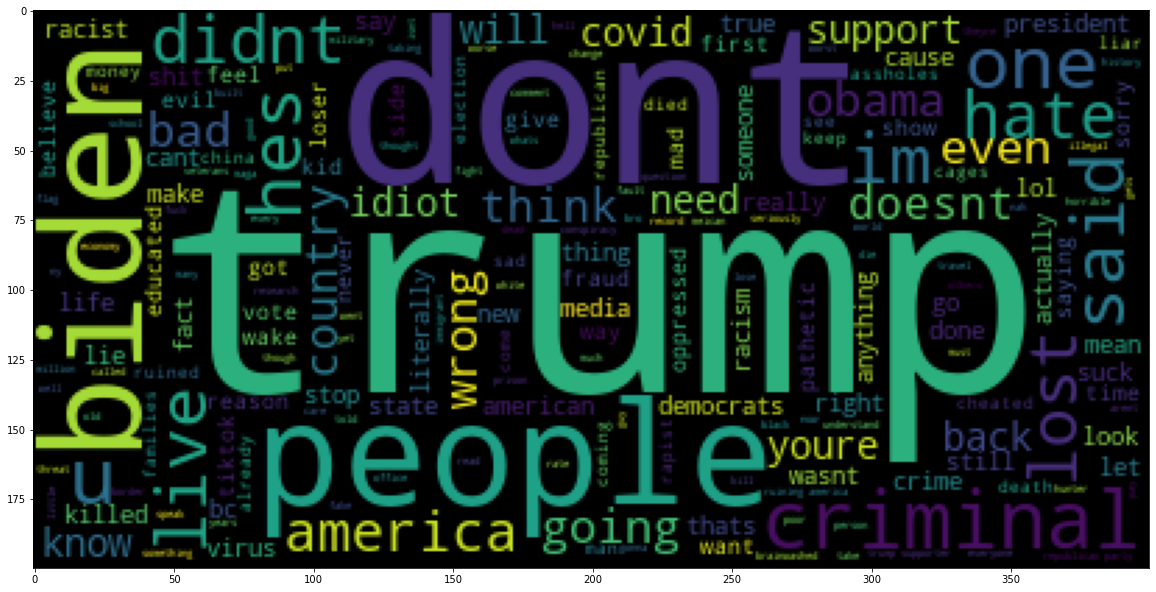

In [45]:
Negative=sentprodfs[sentprodfs['sentiment']=='Negative']
Negative_list = Negative['Comment Text'].to_list()
Negative_words=" ".join(Negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(Negative_words))

### 3.4.2. Positive Word Cloud without stop words

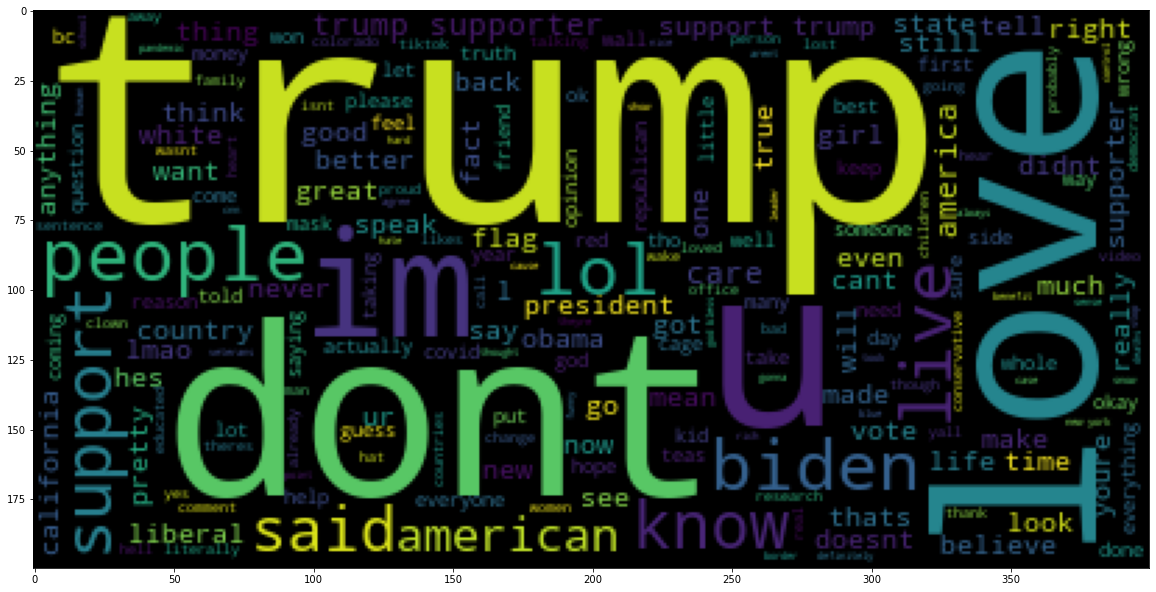

In [46]:
Positive=sentprodfs[sentprodfs['sentiment']=='Positive']
Positive_list=Positive['Comment Text'].to_list()
Positive_words=" ".join(Positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(Positive_words))

## 3.5. Count vectorisation

In [47]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(sentprodfs['clean_comments'])


In [48]:
y=sentprodfs['sentiment']
y.shape

(2531,)

## 3.6. TFIDF

In [49]:
tfidfpro = sentprodfs.copy()

In [50]:
conditions = [
    sentprodfs.sentiment == 'Positive',
    sentprodfs.sentiment == 'Neutral',
    sentprodfs.sentiment <= 'Negative',
]

values = [0, 1, 2]

tfidfpro['label'] = np.select(conditions, values)

In [51]:
from sklearn.model_selection import train_test_split

tfidf_X_train, tfidf_X_test, tfidf_Y_train, tfidf_Y_test = train_test_split(tfidfpro['clean_comments'], tfidfpro['label'], test_size=0.25, random_state=30)
print('Train: ', tfidf_X_train.shape, tfidf_Y_train.shape, 'Test: ',(tfidf_X_test.shape, tfidf_Y_test.shape))


Train:  (1898,) (1898,) Test:  ((633,), (633,))


In [52]:
print('TFIDF Vectorizer……')

vectorizer= TfidfVectorizer()
tfidf_x_train = vectorizer.fit_transform(tfidf_X_train)
tfidf_x_test = vectorizer.transform(tfidf_X_test)

TFIDF Vectorizer……


## 3.7. TFIDF Support Vector Machine

### 3.7.1. Training

In [53]:
tfidfSVM_clf = LinearSVC(random_state=0)

In [54]:
tfidfSVM_clf.fit(tfidf_x_train,tfidf_Y_train)

LinearSVC(random_state=0)

In [55]:
tfidfSVM_y_test_pred=tfidfSVM_clf.predict(tfidf_x_test)

In [56]:
len(tfidfSVM_y_test_pred)

633

In [57]:
tfidfSVM_report=classification_report(tfidf_Y_test, tfidfSVM_y_test_pred, output_dict=True)

In [58]:
tfidfSVM_cm = confusion_matrix(tfidf_Y_test, tfidfSVM_y_test_pred)

Text(33.0, 0.5, 'Data')

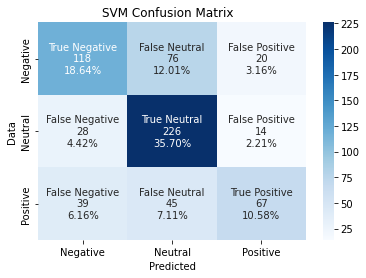

In [59]:
group_names = ["True Negative","False Neutral","False Positive","False Negative","True Neutral","False Positive","False Negative","False Neutral","True Positive"]

group_counts = ["{0:0.0f}".format(value) for value in
                tfidfSVM_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     tfidfSVM_cm.flatten()/np.sum(tfidfSVM_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ax= plt.subplot()
ax.set_title('SVM Confusion Matrix  ');
sns.heatmap(tfidfSVM_cm, annot=labels,ax=ax, fmt='', cmap='Blues')

ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

plt.xlabel('Predicted')
plt.ylabel('Data')

In [60]:
target_names=['Negative','Neutral' ,'Positive']
tfidfSVM_Classification_report = classification_report(tfidf_Y_test, tfidfSVM_y_test_pred, target_names=target_names)

print(tfidfSVM_Classification_report)

              precision    recall  f1-score   support

    Negative       0.64      0.55      0.59       214
     Neutral       0.65      0.84      0.73       268
    Positive       0.66      0.44      0.53       151

    accuracy                           0.65       633
   macro avg       0.65      0.61      0.62       633
weighted avg       0.65      0.65      0.64       633



In [61]:
tfidfSVM_accuracy = (accuracy_score(tfidf_Y_test,tfidfSVM_y_test_pred)*100)

In [62]:
print('ACCURACY',int(round(accuracy_score(tfidf_Y_test,tfidfSVM_y_test_pred)*100)),'%')


ACCURACY 65 %


### 3.7.2. Pro Data Set ML

In [63]:
X = tfidfpro['clean_comments']

In [64]:
y = tfidfpro['label']

In [65]:
vectorizer.fit(X)
x = vectorizer.transform(X)

In [66]:
tfidfSVM_clf = LinearSVC(random_state=0)

In [67]:
tfidfSVM_clf.fit(x,y)

LinearSVC(random_state=0)

In [68]:
tfidfSVM_y_test_pred=tfidfSVM_clf.predict(x)

In [69]:
len(tfidfSVM_y_test_pred)

2531

In [70]:
tfidfSVM_y_test_pred

array([1, 1, 1, ..., 0, 1, 0])

In [71]:
tfidfpro['sent_2']=tfidfSVM_y_test_pred

In [72]:
proTrumpdf = tfidfpro[['sentiment', 'sent_2']]

## 3.8. Data Analysis

In [73]:
proTrumpdf.dropna()

,sentiment,sent_2
0,Neutral,1
1,Neutral,1
2,Neutral,1
3,Neutral,1
4,Neutral,1
...,...,...
2526,Positive,0
2527,Positive,0
2528,Positive,0
2529,Positive,1


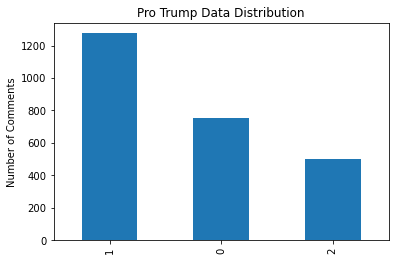

In [74]:
proTrumpdf['sent_2'].value_counts().plot(kind='bar')
plt.ylabel('Number of Comments')
plt.title('Pro Trump Data Distribution')
plt.show()

In [75]:
proTrumpdf['sent_2'].value_counts()

1    1275
0     752
2     504
Name: sent_2, dtype: int64

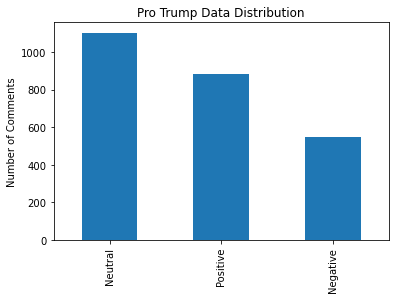

In [76]:
proTrumpdf['sentiment'].value_counts().plot(kind='bar')
plt.ylabel('Number of Comments')
plt.title('Pro Trump Data Distribution')
plt.show()

In [77]:
proTrumpdf['sentiment'].value_counts()

Neutral     1103
Positive     882
Negative     546
Name: sentiment, dtype: int64

In [78]:
sum(fullprodfs['Number of Replies'])

1355

# 4. Anti Data

## 4.1. Lexicon-based Sentiment Analysis

In [79]:
antitext = preprocess(antidfs['Comment Text'])

In [80]:
analyzer = SentimentIntensityAnalyzer()
for text in antitext:
    vs = analyzer.polarity_scores(text)
    print("{:-<65} {}".format(text, str(vs)))
    

this is andrew tate andrew tate --------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pfft ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER USER ------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
yes ------------------------------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}
USER USER ------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
noo ---------------------------------

USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER -----------------------------------

USER hahahah ---------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
bruh trump supporter and found this funny add ------------------- {'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'compound': 0.6678}
USER oh --------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER wtff USER -------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
one of my favorite skit ----------------------------------------- {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.4588}
take me back to dsmp tiktok ------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER started cryyiinngg ----------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
USER ---------------------

In [81]:
analyzer = SentimentIntensityAnalyzer()
antidfs['rating'] = antidfs['Comment Text'].apply(analyzer.polarity_scores)
antidfs = pd.concat([antidfs.drop(['rating'], axis=1), antidfs['rating'].apply(pd.Series)], axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/3464007795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  antidfs['rating'] = antidfs['Comment Text'].apply(analyzer.polarity_scores)


In [82]:
sentiment = []
for sentence in antidfs['Comment Text']:
    
    sid_obj = SentimentIntensityAnalyzer()
    
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
     # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        
        sentiment.append('Positive')
 
    elif sentiment_dict['compound'] <= - 0.05 :
         sentiment.append('Negative')
 
    else :
         sentiment.append('Neutral')

In [83]:
antidfs['sentiment'] = sentiment

In [84]:
sentantidfs = antidfs[['Comment Text', 'sentiment']]

## 4.2. Visualise Data

In [85]:
print_top_n_reviews(antidfs, 'pos', 10)

Score: 1.0, Review: LMAO
Score: 1.0, Review: Wow...
Score: 1.0, Review: Wow
Score: 1.0, Review: LOL
Score: 1.0, Review: haha
Score: 1.0, Review: Yeah..
Score: 1.0, Review: NICE
Score: 1.0, Review: yes
Score: 1.0, Review: funny
Score: 1.0, Review: HELP


In [86]:
print_top_n_reviews(antidfs, 'neg', 10)

Score: 1.0, Review: STOP.
Score: 1.0, Review: No
Score: 1.0, Review: No
Score: 1.0, Review: Cry
Score: 1.0, Review: Shame.
Score: 1.0, Review: no
Score: 1.0, Review: 👻
Score: 1.0, Review: Shame.
Score: 1.0, Review: seriously
Score: 1.0, Review: Embarrassing


## 4.3. Machine Learning

In [87]:
sentantidfs['Comment Text'] = sentantidfs['Comment Text'].apply(clean_tweets)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/93130251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentantidfs['Comment Text'] = sentantidfs['Comment Text'].apply(clean_tweets)


### 4.3.1. Tokenise

In [88]:
sentences=[]
words=[]
for i in range(0,sentantidfs.shape[0]):
    sentences.extend(nltk.sent_tokenize(sentantidfs['Comment Text'][i]))
    words.extend(nltk.word_tokenize(sentantidfs['Comment Text'][i]))
    

In [89]:
for i in range(0,len(sentences)):
    words=nltk.word_tokenize(sentences[i])

In [90]:
sentences = sentantidfs.iloc[0]
sentences['Comment Text']

'is andrew tates andrew tate'

In [91]:
sentantidfs['words'] = sentantidfs.apply(identify_tokens, axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/2897757554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentantidfs['words'] = sentantidfs.apply(identify_tokens, axis=1)


In [92]:
sentantidfs['sentences'] = sentantidfs.apply(identify_tokens, axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/1230993990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentantidfs['sentences'] = sentantidfs.apply(identify_tokens, axis=1)


In [93]:
sentantidfs['sentences']=sentantidfs['sentences'].apply(convert_list_to_string)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/4276071195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentantidfs['sentences']=sentantidfs['sentences'].apply(convert_list_to_string)


In [94]:
sentantidfs

,Comment Text,sentiment,words,sentences
0,is andrew tates andrew tate,Neutral,[is andrew tates andrew tate],is andrew tates andrew tate
1,,Neutral,[],
2,ꨄ aedyn,Neutral,[ꨄ aedyn],ꨄ aedyn
3,,Neutral,[],
4,adnam,Negative,[adnam],adnam
...,...,...,...,...
4024,,Neutral,[],
4025,,Neutral,[],
4026,crying bri,Negative,[crying bri],crying bri
4027,,Neutral,[],


### 4.3.2. Lemmatise

In [95]:
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=nltk.stem.WordNetLemmatizer()

In [96]:
sentantidfs['lemmatizer_tweets']=sentantidfs['sentences'].apply(lemmatize_text)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_2223/3471925774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentantidfs['lemmatizer_tweets']=sentantidfs['sentences'].apply(lemmatize_text)


In [97]:
sentantidfs

,Comment Text,sentiment,words,sentences,lemmatizer_tweets
0,is andrew tates andrew tate,Neutral,[is andrew tates andrew tate],is andrew tates andrew tate,"[is, andrew, tate, andrew, tate]"
1,,Neutral,[],,[]
2,ꨄ aedyn,Neutral,[ꨄ aedyn],ꨄ aedyn,"[ꨄ, aedyn]"
3,,Neutral,[],,[]
4,adnam,Negative,[adnam],adnam,[adnam]
...,...,...,...,...,...
4024,,Neutral,[],,[]
4025,,Neutral,[],,[]
4026,crying bri,Negative,[crying bri],crying bri,"[cry, bri]"
4027,,Neutral,[],,[]


## 4.4. Removing stop words

In [98]:
nltk.download('words')

stop = stopwords.words('english')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/tarateylouni/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [99]:
sentantidfs['clean_comments']=sentantidfs['Comment Text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))


### 4.4.1. Negative WordCloud without stopwords

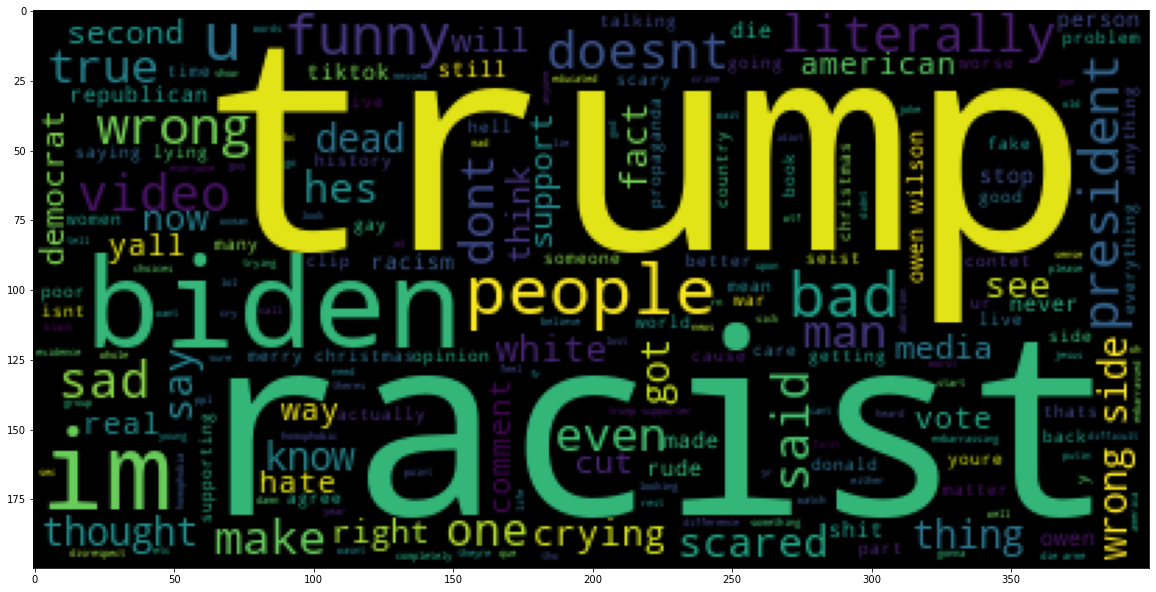

In [100]:
Negative=sentantidfs[sentantidfs['sentiment']=='Negative']
Negative_list = Negative['Comment Text'].to_list()
Negative_words=" ".join(Negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(Negative_words))

### 4.4.2. Positive WordCloud without stopwords

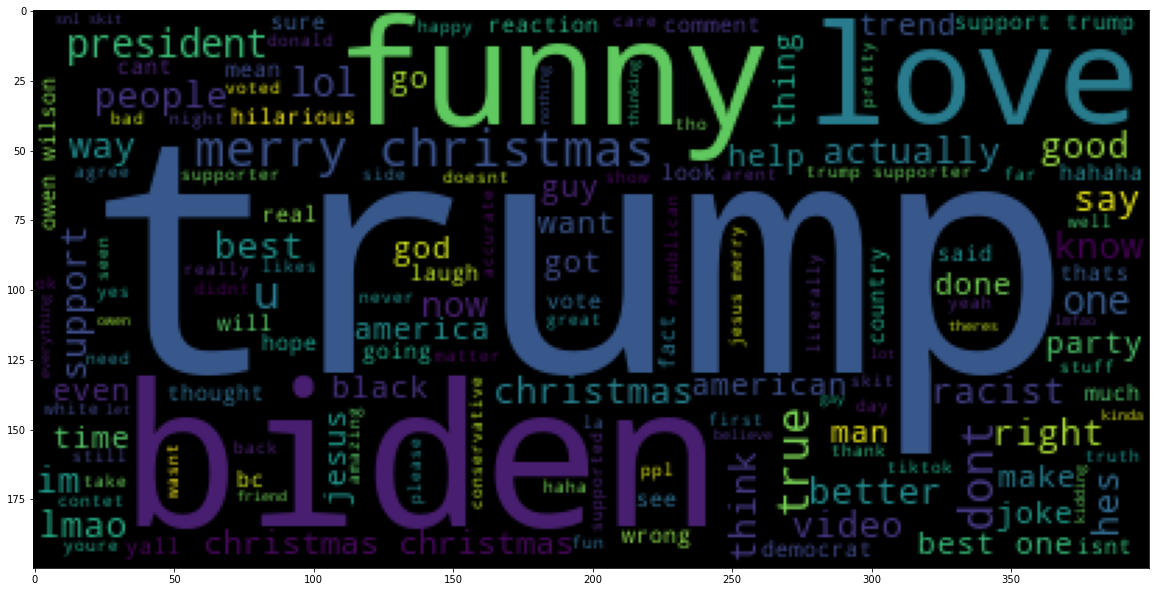

In [101]:
Positive=sentantidfs[sentantidfs['sentiment']=='Positive']
Positive_list=Positive['Comment Text'].to_list()
Positive_words=" ".join(Positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(Positive_words))

## 4.5. Count Vectorisation

In [102]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(sentantidfs['clean_comments'])


In [103]:
y=sentantidfs['sentiment']
y.shape

(4029,)

## 4.6. TFIDF

In [104]:
tfidfanti = sentantidfs.copy()

In [105]:
conditions = [
    sentantidfs.sentiment == 'Positive',
    sentantidfs.sentiment == 'Neutral',
    sentantidfs.sentiment <= 'Negative',
]

values = [0, 1, 2]

tfidfanti['label'] = np.select(conditions, values)

In [106]:
tfidf_X_train, tfidf_X_test, tfidf_Y_train, tfidf_Y_test = train_test_split(tfidfanti['clean_comments'], tfidfanti['label'], test_size=0.25, random_state=30)
print('Train: ', tfidf_X_train.shape, tfidf_Y_train.shape, 'Test: ',(tfidf_X_test.shape, tfidf_Y_test.shape))

Train:  (3021,) (3021,) Test:  ((1008,), (1008,))


In [107]:
print('TFIDF Vectorizer……')

vectorizer= TfidfVectorizer()
tfidf_x_train = vectorizer.fit_transform(tfidf_X_train)
tfidf_x_test = vectorizer.transform(tfidf_X_test)

TFIDF Vectorizer……


## 4.7. TFIDF Support Vector Machine

### 4.7.1. Training

In [108]:
tfidfSVM_clf = LinearSVC(random_state=0)

In [109]:
tfidfSVM_clf.fit(tfidf_x_train,tfidf_Y_train)

LinearSVC(random_state=0)

In [110]:
tfidfSVM_y_test_pred=tfidfSVM_clf.predict(tfidf_x_test)

In [111]:
tfidfSVM_report=classification_report(tfidf_Y_test, tfidfSVM_y_test_pred, output_dict=True)

In [112]:
tfidfSVM_cm = confusion_matrix(tfidf_Y_test, tfidfSVM_y_test_pred)

Text(33.0, 0.5, 'Data')

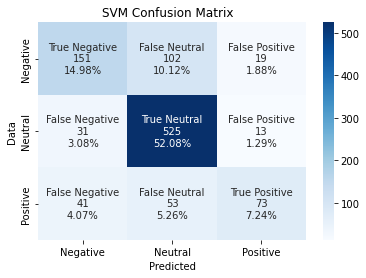

In [113]:
group_names = ["True Negative","False Neutral","False Positive","False Negative","True Neutral","False Positive","False Negative","False Neutral","True Positive"]

group_counts = ["{0:0.0f}".format(value) for value in
                tfidfSVM_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     tfidfSVM_cm.flatten()/np.sum(tfidfSVM_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ax= plt.subplot()
ax.set_title('SVM Confusion Matrix  ');
sns.heatmap(tfidfSVM_cm, annot=labels,ax=ax, fmt='', cmap='Blues')

ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

plt.xlabel('Predicted')
plt.ylabel('Data')

In [114]:
target_names=['Negative','Neutral' ,'Positive']
tfidfSVM_Classification_report = classification_report(tfidf_Y_test, tfidfSVM_y_test_pred, target_names=target_names)

print(tfidfSVM_Classification_report)

              precision    recall  f1-score   support

    Negative       0.68      0.56      0.61       272
     Neutral       0.77      0.92      0.84       569
    Positive       0.70      0.44      0.54       167

    accuracy                           0.74      1008
   macro avg       0.71      0.64      0.66      1008
weighted avg       0.73      0.74      0.73      1008



In [115]:
tfidfSVM_accuracy = (accuracy_score(tfidf_Y_test,tfidfSVM_y_test_pred)*100)

In [116]:
print('ACCURACY',int(round(accuracy_score(tfidf_Y_test,tfidfSVM_y_test_pred)*100)),'%')


ACCURACY 74 %


### 4.7.2. Anti Data Set ML

In [117]:
X = tfidfanti['clean_comments']

In [118]:
y = tfidfanti['label']

In [119]:
vectorizer.fit(X)
x = vectorizer.transform(X)

In [120]:
tfidfSVM_clf = LinearSVC(random_state=0)

In [121]:
tfidfSVM_clf.fit(x, y)

LinearSVC(random_state=0)

In [122]:
tfidfSVM_y_pred = tfidfSVM_clf.predict(x)

In [123]:
len(tfidfSVM_y_pred)

4029

In [124]:
tfidfSVM_y_pred

array([1, 1, 1, ..., 2, 1, 1])

In [125]:
tfidfanti['sent_2'] = tfidfSVM_y_pred

In [126]:
antiTrumpdf = tfidfanti[['sentiment', 'sent_2']]

## 4.8. Data Analysis

In [127]:
antiTrumpdf.dropna()

,sentiment,sent_2
0,Neutral,1
1,Neutral,1
2,Neutral,1
3,Neutral,1
4,Negative,2
...,...,...
4024,Neutral,1
4025,Neutral,1
4026,Negative,2
4027,Neutral,1


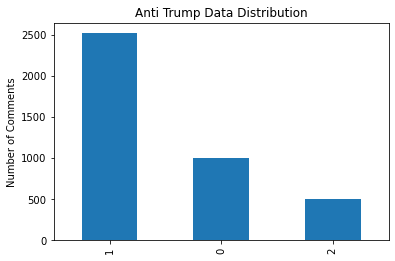

In [128]:
antiTrumpdf['sent_2'].value_counts().plot(kind='bar')
plt.ylabel('Number of Comments')
plt.title('Anti Trump Data Distribution')
plt.show()

In [129]:
antiTrumpdf['sent_2'].value_counts()

1    2521
0    1002
2     506
Name: sent_2, dtype: int64

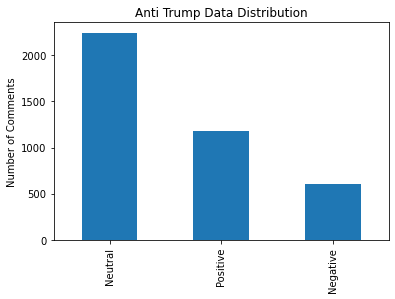

In [130]:
antiTrumpdf['sentiment'].value_counts().plot(kind='bar')
plt.ylabel('Number of Comments')
plt.title('Anti Trump Data Distribution')
plt.show()

In [131]:
antiTrumpdf['sentiment'].value_counts()

Neutral     2242
Positive    1181
Negative     606
Name: sentiment, dtype: int64

In [132]:
sum(fullantidfs['Number of Replies'])

1227

In [133]:
proTrumpdf.to_csv('proTrump.csv', index=False)

In [134]:
antiTrumpdf.to_csv('antiTrump.csv', index=False)

# 5. Hypothesis Tests

## 5.1. Pro-Trump Data

In [135]:
table = [[752, 1275,  504], [2531, 2531, 2531]]
stat, p, dof, expected = chi2_contingency(table)
print('X-squared = %.2f, df = %d, p-value = %.5f' % (stat, dof, p))


X-squared = 268.37, df = 2, p-value = 0.00000


In [136]:
count = np.array([752, 504])
nobs = np.array([1256, 1256])
stat, pval = proportions_ztest(count, nobs, alternative='larger')
print('stat=%.3f, p=%.3f' % (stat, pval))

stat=9.896, p=0.000


## 5.2. Anti-Trump Data

In [137]:
table = [[1002, 2521,  506], [4029, 4029, 4029]]
stat, p, dof, expected = chi2_contingency(table)
print('X-squared = %.2f, df = %d, p-value = %.5f' % (stat, dof, p))


X-squared = 1168.36, df = 2, p-value = 0.00000


In [138]:
count = np.array([1002, 506])
nobs = np.array([1508, 1508])
stat, pval = proportions_ztest(count, nobs, alternative='larger')
print('stat=%.3f, p=%.3f' % (stat, pval))

stat=18.063, p=0.000


## 5.3. All Trump Data

In [139]:
table = [[1754, 3796,  1010], [6560, 6560, 6560]]
stat, p, dof, expected = chi2_contingency(table)
print('X-squared = %.2f, df = %d, p-value = %.5f' % (stat, dof, p))


X-squared = 1366.52, df = 2, p-value = 0.00000


In [140]:
count = np.array([1754, 1010])
nobs = np.array([2764, 2764])
stat, pval = proportions_ztest(count, nobs, alternative='larger')
print('stat=%.3f, p=%.3f' % (stat, pval))

stat=20.013, p=0.000
